In [1]:
import ROOT as r
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)

import hist
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use(hep.style.CMS)

In [29]:
df = r.RDataFrame("Events", "/data/userdata/aaarora/output/run2/sig.root")
df = df.Filter("isMuon")

In [30]:
h1 = df.Filter("passCut1 == 1 & passCut2 == 1").Histo1D(("", "", 100, 35, 100), "GLepton_pt", "weight")
h2 = df.Filter("passCut2 == 1").Histo1D(("", "", 100, 35, 100), "GLepton_pt", "weight")

In [31]:
h1 = h1.GetValue()
h2 = h2.GetValue()

h1.Sumw2()
h2.Sumw2()

h1.Divide(h2)

True

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


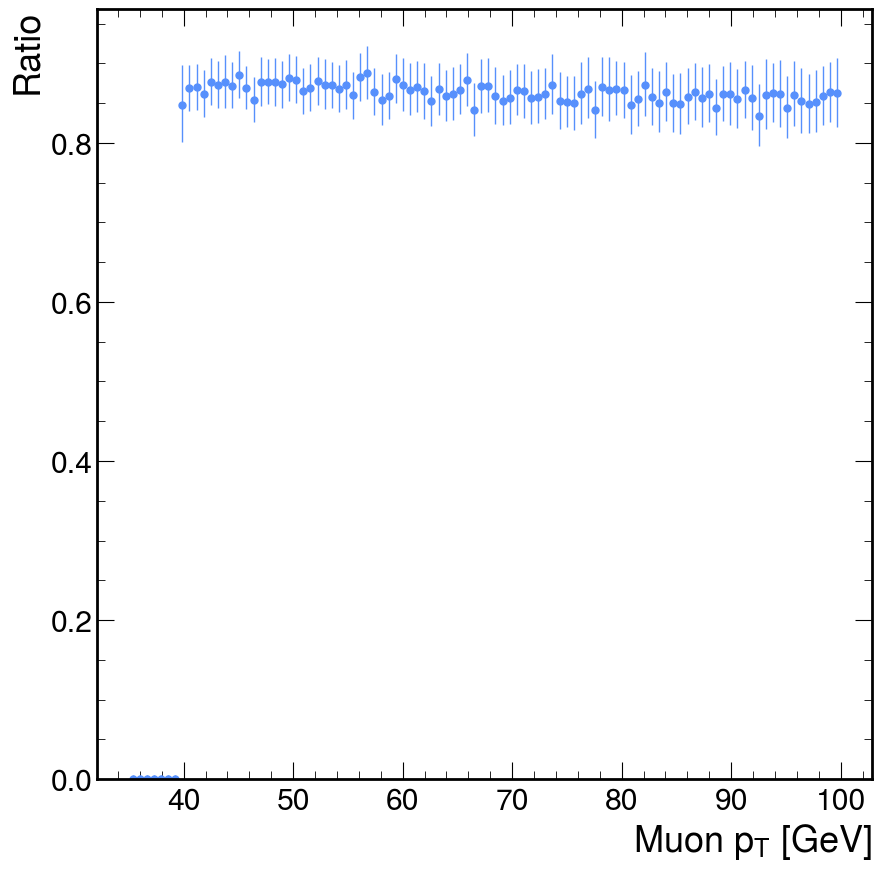

In [32]:
fig, ax = plt.subplots()

# hep.histplot(h1, ax=ax, label="Passes Trigger")
# hep.histplot(h2, ax=ax, label="Fails Trigger")
hep.histplot(h1, ax=ax, histtype="errorbar")
ax.set_xlabel(r"Muon $p_T$ [GeV]")
ax.set_ylabel("Ratio")
ax.legend()

In [14]:
with uproot.open("/data/userdata/aaarora/output/run2/bkg_MVA.root") as f:
    df2 = f.get("Events").arrays(library="pd")

df2 = df2.sort_values(["event"]).reset_index(drop=True)

In [ ]:
eff = []
for i in np.arange(0.6, 0.9, 0.01):    
    sig = get_abcd("/data/userdata/aaarora/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/sig_MVA_abcdnet.root", BDT_CUT=i)
    bkg = get_abcd("/data/userdata/aaarora/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/bkg_MVA_abcdnet.root", BDT_CUT=i)
    eff.append(sig[0] / np.sqrt(bkg[0]))

idx = eff.index(max(eff))
cut = 0.6 + idx * 0.01
print(cut)

In [ ]:
h1 = hist.Hist.new.Reg(100, 0, 1, name="SIG", label="SIG").Double()
h1.fill(df1.VBSBDTscore, weight=df1.weight)

h2 = hist.Hist.new.Reg(100, 0, 1, name="BKG", label="BKG").Double()
h2.fill(df2.VBSBDTscore, weight=df2.weight)

In [ ]:
fig, ax = plt.subplots()
hep.histplot(h1, ax=ax, label="Signal", color="red", density=True)
hep.histplot(h2, ax=ax, label="Background", color="blue", density=True)

ax.legend()
ax.set_xlabel("VBSBDT Score")
ax.set_ylabel("Density")
ax.set_yscale("log")

In [ ]:
df2.LHEScaleWeight_muR

In [ ]:
df1.weight

In [ ]:
df2.weight

In [ ]:
df1.query("passCut9")

In [ ]:
BDT_CUT = 0.56
DNN_CUT = 0.92

df1.query("VBSBDTscore > @BDT_CUT & abcdnet_score > @DNN_CUT").weight.sum()

In [ ]:
BDT_CUT = 0.56
DNN_CUT = 0.92
df3 = df1[(df1.VBSBDTscore > BDT_CUT) & (df1.abcdnet_score > DNN_CUT)]
df4 = df2[(df2.VBSBDTscore > BDT_CUT) & (df2.abcdnet_score > DNN_CUT)]

In [ ]:
df3.weight.sum()

In [ ]:
df4.weight.sum()

In [ ]:
df4[~df4.event.isin(df3.event)]

In [ ]:
df3.weight.sum(), df4.weight.sum()

In [ ]:
with uproot.open("/ceph/cms/store/user/aaarora/VBS_1lep_skims/data_1lep_4ak4_or_1ak8_2ak4_v1/RunIISummer20UL16NanoAODAPVv9/VBSWZH_MJJ-100_4f_TuneCP5_13TeV-madgraph-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_preVFP_v11-v2/4000/skimmed/output_merged2.root") as f:
    df = f.get("Events").arrays(["Jet_genJetIdx"], library="pd")    

In [1]:
import ROOT as r

In [35]:
df = r.RDataFrame("Events", "/data/userdata/aaarora/E5D40CC6-421E-4D4F-B994-86EE04118865.root")

In [ ]:
r.gInterpreter.Declare("""
ROOT::VecOps::RVec<float> Electron_E(const ROOT::VecOps::RVec<float>& pt, const ROOT::VecOps::RVec<float>& eta, const ROOT::VecOps::RVec<float>& phi, const ROOT::VecOps::RVec<float>& mass) {
    ROOT::VecOps::RVec<float> E;
    for (int i = 0; i < pt.size(); i++) {
        E.push_back(TLorentzVector(pt[i], eta[i], phi[i], mass[i]).E());
    }
    return E;
}
""")

In [36]:
df = df.Define("Electron_E", "Electron_E(Electron_pt, Electron_eta, Electron_phi, Electron_mass)")
df = df.Define("BadElec", "Sum(Electron_E <= 0 && abs(Electron_eta) > 1.5 && abs(Electron_eta) < 2.5 && Electron_r9 > 0.98)")
df = df.Define("GoodElec", "Sum(Electron_E > 0 && abs(Electron_eta) > 1.5 && abs(Electron_eta) < 2.5 && Electron_r9 > 0.98)")

df = df.Define("BadElecOut", "Sum(Electron_E <= 0)")
df = df.Define("GoodElecOut", "Sum(Electron_E > 0)")

nbad = df.Sum("BadElec").GetValue()
ngood = df.Sum("GoodElec").GetValue()
nbadout = df.Sum("BadElecOut").GetValue()
ngoodout = df.Sum("GoodElecOut").GetValue()

In [ ]:
nbad / (nbad + ngood)

In [ ]:
nbadout / (nbadout + ngoodout)